# I Ching Log

Questo è un test per capire se l'I Ching è completamente casuale o se le letture sono in qualche modo significative.

Il campione di controllo consiste in 10.000 letture dell'I Ching eseguite con [`iching-cli`](https://github.com/cantaprete/iching-cli) con il comando:

```sh
echo "time,hex,type" > rand.csv

for i in {1..10000};
do
    iching -w -c >> rand.csv ;
done
```

Il risultato è (prevedibilmente), casuale:

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [62]:
rand_log = pd.read_csv('rand.csv', sep=',')
rand_log.set_index('time', inplace=True)

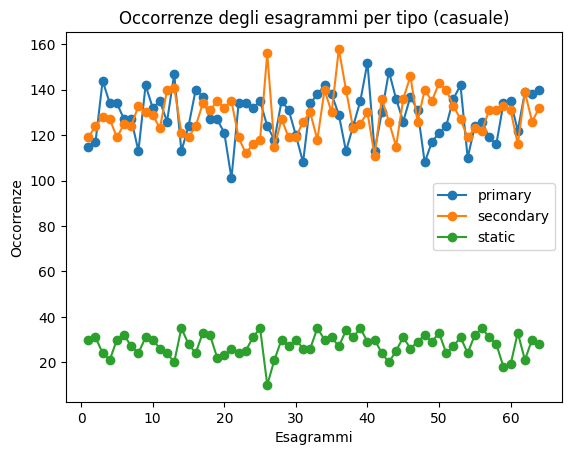

In [63]:

fig, ax = plt.subplots()
for type in rand_log['type'].unique():
    df_type = rand_log[rand_log['type'] == type]
    counts = df_type['hex'].value_counts().sort_index()
    ax.plot(counts.index, counts.values, label=type, marker='o')

ax.set_xlabel('Esagrammi')
ax.set_ylabel('Occorrenze')
ax.set_title('Occorrenze degli esagrammi per tipo (casuale)')
ax.legend()
plt.show()

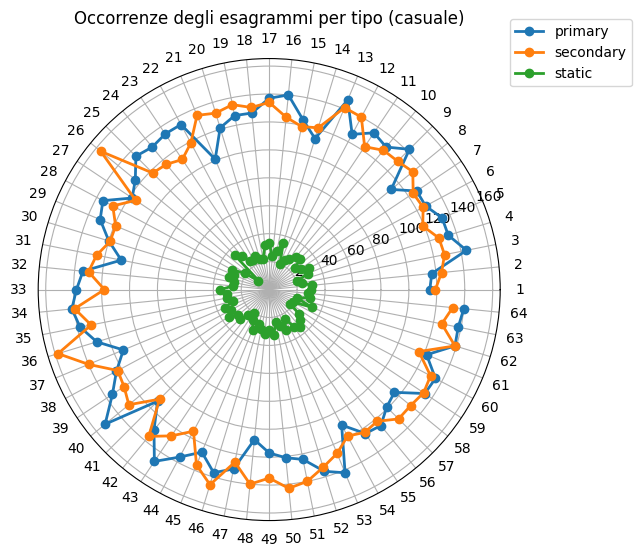

In [64]:
types = rand_log['type'].unique()
hex_values = range(1, 65)
data = []
for type in types:
    df_type = rand_log[rand_log['type'] == type]
    counts = [df_type[df_type['hex'] == hex_value].shape[0] for hex_value in hex_values]
    data.append(counts)

# Crea il chart radar
angles = np.linspace(0, 2*np.pi, len(hex_values), endpoint=False)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)
for i, counts in enumerate(data):
    ax.plot(angles, counts, 'o-', linewidth=2, label=types[i])

ax.set_thetagrids(angles * 180/np.pi, hex_values)
ax.set_title('Occorrenze degli esagrammi per tipo (casuale)')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

In [65]:
sig_log = pd.read_csv('sig.csv', sep=',')
sig_log.set_index('time', inplace=True)

Questi, invece, sono i medesimi grafici utilizzando letture significative, ossia precedute dal desiderio di interrogare l'I Ching su una specifica domanda:

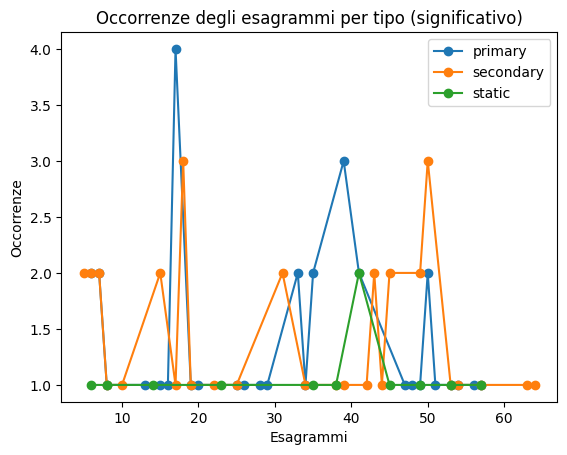

In [66]:
fig, ax = plt.subplots()
for type in sig_log['type'].unique():
    df_type = sig_log[sig_log['type'] == type]
    counts = df_type['hex'].value_counts().sort_index()
    ax.plot(counts.index, counts.values, label=type, marker='o')

ax.set_xlabel('Esagrammi')
ax.set_ylabel('Occorrenze')
ax.set_title('Occorrenze degli esagrammi per tipo (significativo)')
ax.legend()
plt.show()

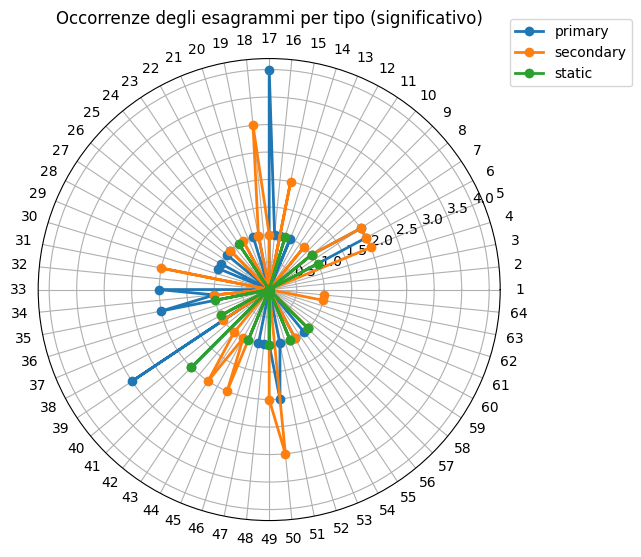

In [67]:
types = sig_log['type'].unique()
hex_values = range(1, 65)
data = []
for type in types:
    df_type = sig_log[sig_log['type'] == type]
    counts = [df_type[df_type['hex'] == hex_value].shape[0] for hex_value in hex_values]
    data.append(counts)

angles = np.linspace(0, 2*np.pi, len(hex_values), endpoint=False)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)
for i, counts in enumerate(data):
    ax.plot(angles, counts, 'o-', linewidth=2, label=types[i])

ax.set_thetagrids(angles * 180/np.pi, hex_values)
ax.set_title('Occorrenze degli esagrammi per tipo (significativo)')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

Al momento i dati sono troppo pochi (89 contro 10.000) per trarre qualsiasi conclusione sensata.

Ciò che mi aspetto è uno di questi tre casi:

1. Indipendentemente dal numero di letture, i grafici non mostrano un andamento grossomodo casuale ma mostrano invece degli sbilanciamenti verso alcuni esagrammi, sia questo in generale o per un tipo specifico.
2. Con l'approssimarsi di un numero sufficiente di letture, l'andamento è nel complesso grossomodo casuale. Nonostante ciò, se analizzato in blocchi determinati da periodi di tempo variabili ma significativi mostra sbilanciamenti verso alcuni esagrammi, sia questo in generale o per un tipo specifico.  Questo si spiegherebbe considerando che nel lungo periodo le questioni sottoposte all'I Ching variano, e con ciò la varietà delle risposte; ma presi in periodi significativi (ossia in periodi nei quali la maggior parte delle domande verteva sui medesimi quesiti), mostrano una preponderanza di certe risposte rispetto alle altre.
3. Grossomodo casuale sia nella totalità sia in sottoinsiemi temporali significativi.